In [66]:
import urllib.request
import re
from collections import OrderedDict
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
#https://github.com/nficano/pytube
from pytube import YouTube
import cv2
import numpy as np

In [38]:
def get_youtube_paths(playlist_url):

    final_url = []
    eq = playlist_url.rfind('=') + 1
    cPL = playlist_url[eq:]
    yTUBE = urllib.request.urlopen(playlist_url).read()
    sTUBE = str(yTUBE)
    tmp_mat = re.compile(r'watch\?v=\S+?list=' + cPL)
    mat = re.findall(tmp_mat, sTUBE)
    for PL in mat:
        yPL = str(PL)
        if '&' in yPL:
            yPL_amp = yPL.index('&')
        final_url.append('http://www.youtube.com/' + yPL[:yPL_amp])

    all_url = list(OrderedDict.fromkeys(final_url))

    video_dict = {}

    for url in all_url:
        yt = YouTube(url)
        title = yt.title
        date_string = re.findall("(\d+\-\d+\-\d+)", title)
        date = datetime.strptime(date_string[0], "%d-%m-%Y")
        video_dict[date.date()] = yt.streams.first().url

        video_dates = sorted(video_dict.keys())

    if verbose:
        for date in video_dates:
            print(date)
            print(video_dict[date])

    return video_dates, video_dict

In [39]:
def yield_playlist(date):
    img_index = 0
    url = url_dict.get(date, False)
    print(url)
    if url:
        cap = cv2.VideoCapture(url)
        if not cap.isOpened():
            print('\n>>> Failed to capture {}'.format(date))
            yield None
        else:
            ret = True
            while ret:
                ret, frame = cap.read()
                yield img_index, frame
                img_index += 1
                if img_index > 10:
                    ret = False

            cap.release()

In [40]:
playlist_url = "https://www.youtube.com/watch?v=f5V-cH-9udI&list=UUDDgDE-EMc-tSyp7xy4Pk9w"

In [41]:
dates, url_dict = get_youtube_paths(playlist_url)

In [43]:
for date in dates:
    print(date)
    print(url_dict[date])

2015-10-28
https://r4---sn-aigzrn7d.googlevideo.com/videoplayback?source=youtube&ratebypass=yes&mv=m&dur=556.001&lmt=1446080581697395&itag=22&ms=au,onr&sparams=dur,ei,id,initcwndbps,ip,ipbits,itag,lmt,mime,mm,mn,ms,mv,pl,ratebypass,requiressl,source,expire&key=yt6&ipbits=0&mm=31,26&mn=sn-aigzrn7d,sn-5hne6nsz&initcwndbps=843750&expire=1533512166&c=WEB&id=o-APylqTwY8emJ9SmNXyXWAxflivFwmZCZBPnGEkI-WvNn&fvip=4&mt=1533490436&ip=31.48.164.182&requiressl=yes&ei=hjVnW9uZHZOlxwKSioagDQ&mime=video/mp4&signature=9A2A47C4AE978F81190FD40CC9A692C6BA516E8F.282AA3007F7188DC2CF0CCD51225C12581452C91&pl=22
2015-10-29
https://r5---sn-aigl6ner.googlevideo.com/videoplayback?fvip=5&sparams=dur,ei,id,initcwndbps,ip,ipbits,itag,lmt,mime,mm,mn,ms,mv,pl,ratebypass,requiressl,source,expire&ip=31.48.164.182&ratebypass=yes&ipbits=0&expire=1533512277&lmt=1446165883626710&signature=179CF32B17CAD360232DF62ED559C6C39C078D4A.685BA620600357EC63746CB1A25CBF93ACB847AD&initcwndbps=847500&c=WEB&ei=9TVnW9v1FpGj1gb2xYaQAg&mime

In [59]:
#start_date = datetime.strptime('2015-11-05 00:00:00', '%Y-%m-%d %H:%M:%S')
start_date = min(dates)
end_date = max(dates)
print(start_date)
print(end_date)
graphic_start = datetime.strptime('2015-10-26 00:00:00', '%Y-%m-%d %H:%M:%S').date()
diff = end_date - graphic_start
weeks = int(diff.days/ 7) + 1
print(weeks)

2015-10-28
2016-02-25
18


In [67]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
date_list = [graphic_start + timedelta(days=x*7) for x in range(0, weeks)]

In [72]:
# Load example to get size
cap = cv2.VideoCapture(url_dict[dates[0]])
ret, frame = cap.read()
row, col, ch = frame.shape
blank_image = np.zeros((col, row, ch), dtype = "uint8")

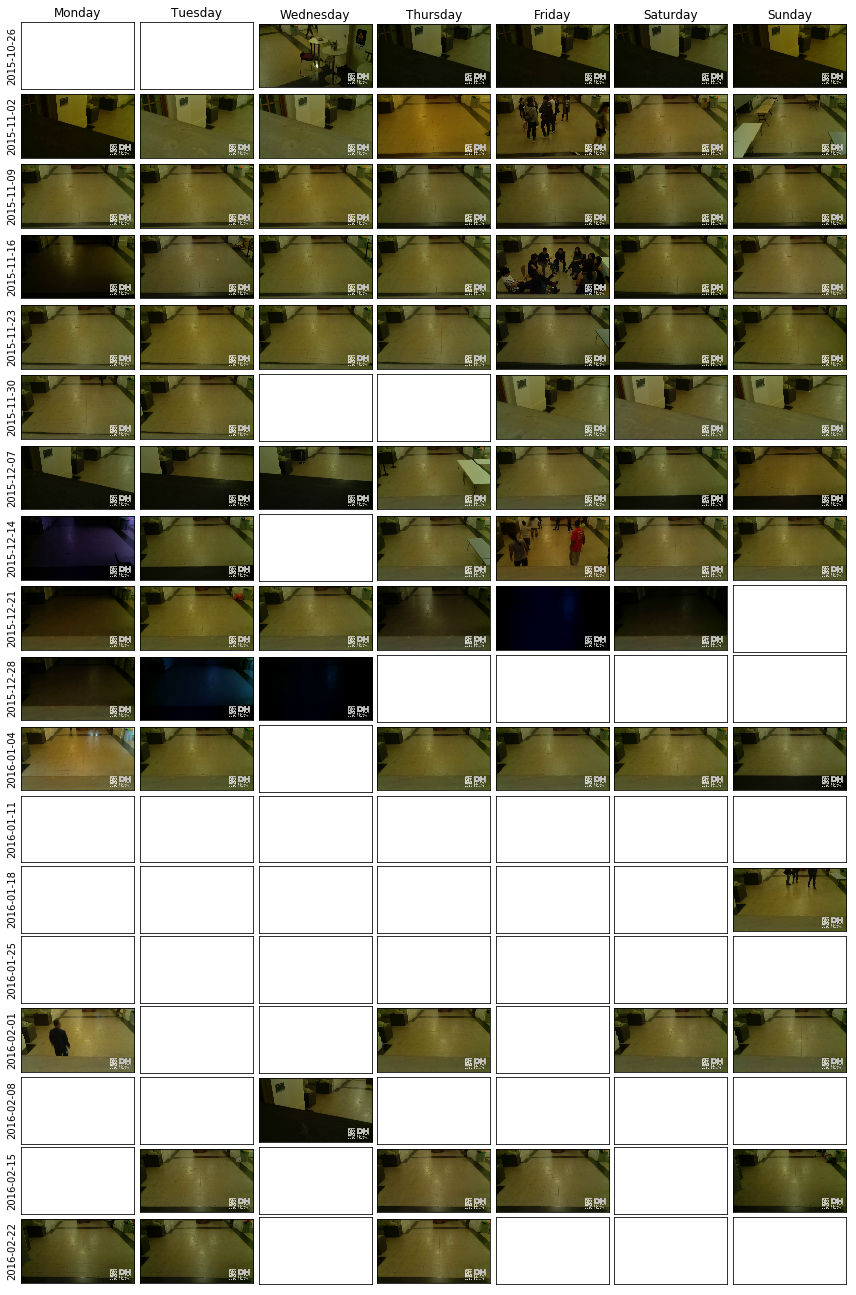

In [75]:
fig, axes = plt.subplots(nrows=weeks, ncols=7, figsize=(12, 1 * weeks)) 

date = graphic_start

for w, week in enumerate(date_list):
    axes[w, 0].set_ylabel(week)
    for d, day in enumerate(days):
        url = url_dict.get(date, False)
        if url:
            cap = cv2.VideoCapture(url)
            ret, frame = cap.read()
            if ret:
                imgrc = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                axes[w, d].imshow(imgrc)
            else:
                axes[w, d].imshow(blank_image)
        cap.release()
        date += timedelta(days=1)
        axes[w,d].set_xticks([])
        axes[w,d].set_yticks([])
        
pad = 5
for ax, day in zip(axes[0], days):
    ax.annotate(day, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')
        
fig.tight_layout()
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.05, hspace=0.05)
plt.show()
 

In [76]:
#fig.savefig('figures/3_0.png', bbox_inches='tight')

In [7]:
playlist_url = "https://www.youtube.com/watch?v=f5V-cH-9udI&list=UUDDgDE-EMc-tSyp7xy4Pk9w"

In [28]:
final_url = []

In [29]:
eq = url.rfind('=') + 1
cPL = url[eq:]
yTUBE = urllib.request.urlopen(url).read()
sTUBE = str(yTUBE)

In [30]:
tmp_mat = re.compile(r'watch\?v=\S+?list=' + cPL)
mat = re.findall(tmp_mat, sTUBE)

In [31]:
for PL in mat:
    yPL = str(PL)
    if '&' in yPL:
        yPL_amp = yPL.index('&')
    final_url.append('http://www.youtube.com/' + yPL[:yPL_amp])

all_url = list(OrderedDict.fromkeys(final_url))

In [35]:
video_dict = {}
yt_list = []

for url in all_url:
    yt = YouTube(url)
    title = yt.title
    date_string = re.findall("(\d+\-\d+\-\d+)", title)
    date = datetime.strptime(date_string[0], "%d-%m-%Y")
    video_dict[date] = yt.streams.first().url

In [36]:
sorted_video_dates = sorted(video_dict.keys())

In [37]:
for date in sorted_video_dates:
    print(date)
    print(video_dict[date])

2015-10-28 00:00:00
https://r4---sn-aigzrn7d.googlevideo.com/videoplayback?itag=22&mv=m&mt=1533316720&ratebypass=yes&requiressl=yes&ms=au,onr&pl=16&fvip=4&mime=video/mp4&dur=556.001&id=o-AOE7_eD7xuOwVuS7MlpulNExyneQN_Vqe-yR3fPSARWV&mn=sn-aigzrn7d,sn-5hne6nsz&ip=144.82.8.184&signature=32AD611433B3A83F71019453D005EF722E4CD0.5367D0D15A36864C43DEC997D704A32B69160827&source=youtube&mm=31,26&sparams=dur,ei,id,initcwndbps,ip,ipbits,itag,lmt,mime,mm,mn,ms,mv,pl,ratebypass,requiressl,source,expire&ei=_o5kW-ewI8z3Vu3Pg0g&key=yt6&lmt=1446080581697395&beids=[9466591]&ipbits=0&initcwndbps=1357500&c=WEB&expire=1533338462
2015-10-29 00:00:00
https://r5---sn-aigzrn7e.googlevideo.com/videoplayback?fvip=5&sparams=dur,ei,id,initcwndbps,ip,ipbits,itag,lmt,mime,mm,mn,ms,mv,pl,ratebypass,requiressl,source,expire&ip=144.82.8.184&ratebypass=yes&ipbits=0&expire=1533338543&lmt=1446165883626710&signature=BE1583FF032741B05EC76DB4DD3B19BBCE229500.6C55BD9FBA4ED97CD2E18665EA29C6F70297477F&initcwndbps=1357500&c=WEB&e

In [63]:
#start_date = datetime.strptime('2015-11-05 00:00:00', '%Y-%m-%d %H:%M:%S')
start_date = min(sorted_video_dates)
end_date = max(sorted_video_dates)
print(start_date)
print(end_date)
graphic_start = datetime.strptime('2015-10-28 00:00:00', '%Y-%m-%d %H:%M:%S')
diff = end_date - graphic_start
weeks = int(diff.days/ 7) + 1
#graphic_end = datetime.strptime('2015-10-28 00:00:00', '%Y-%m-%d %H:%M:%S')

2015-10-28 00:00:00
2016-02-25 00:00:00


0
2015-10-28 00:00:00
1
2015-10-29 00:00:00
2
2015-10-30 00:00:00
3
2015-10-31 00:00:00
4
2015-11-01 00:00:00
5
2015-11-02 00:00:00
6
2015-11-03 00:00:00
7
2015-11-04 00:00:00
8
2015-11-05 00:00:00
9
2015-11-06 00:00:00
10
2015-11-07 00:00:00
11
2015-11-08 00:00:00
12
2015-11-09 00:00:00
13
2015-11-10 00:00:00
14
2015-11-11 00:00:00
15
2015-11-12 00:00:00
16
2015-11-13 00:00:00
17
2015-11-14 00:00:00
18
2015-11-15 00:00:00
19
2015-11-16 00:00:00
20
2015-11-17 00:00:00
21
2015-11-18 00:00:00
22
2015-11-19 00:00:00
23
2015-11-20 00:00:00
24
2015-11-21 00:00:00
25
2015-11-22 00:00:00
26
2015-11-23 00:00:00
27
2015-11-24 00:00:00
28
2015-11-25 00:00:00
29
2015-11-26 00:00:00
30
2015-11-27 00:00:00
31
2015-11-28 00:00:00
32
2015-11-29 00:00:00
33
2015-11-30 00:00:00
34
2015-12-01 00:00:00
35
2015-12-02 00:00:00
36
2015-12-03 00:00:00
37
2015-12-04 00:00:00
38
2015-12-05 00:00:00
39
2015-12-06 00:00:00
40
2015-12-07 00:00:00
41
2015-12-08 00:00:00
42
2015-12-09 00:00:00
43
2015-12-10 00:00:0

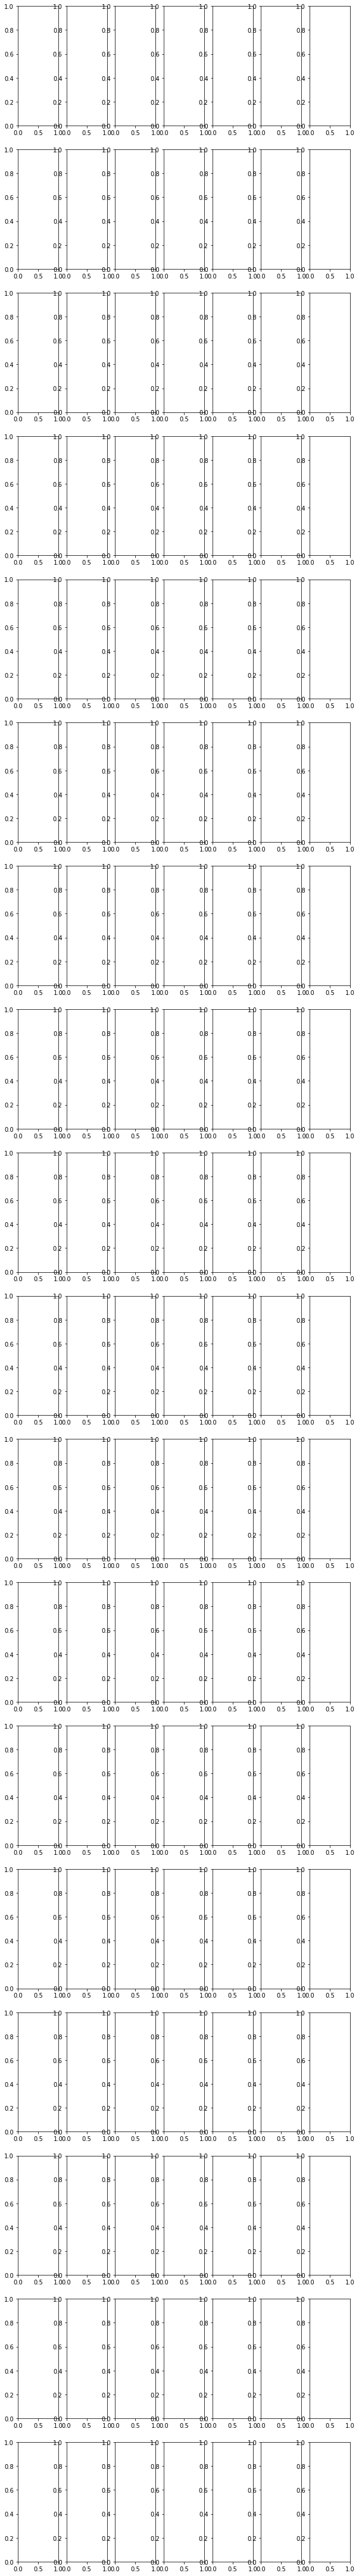

In [70]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, axes = plt.subplots(nrows=weeks, ncols=7, figsize=(10, 1 * len(sorted_video_dates))) 

date = graphic_start
days = 0
while days < weeks * 7:
    print(days)
    print(date)
    col = days % 7
    row = int(days / 7)
    url = video_dict.get(date, False)
    if url:
        cap = cv2.VideoCapture(url)
        ret, frame = cap.read()
        if ret:
            axes[col, row].imshow(frame)
    cap.release()
    days += 1
    date += timedelta(days=1)
 

In [ ]:
# open url with opencv
cap = cv2.VideoCapture(url)

# check if url was opened
if not cap.isOpened():
    print('video not opened')
    exit(-1)

while True:
    # read frame
    print('read')
    ret, frame = cap.read()

    # check if frame is empty
    if not ret:
        print('empty')
        break

    # display frame
    print('image')
    cv2.imshow('frame', frame)
    print('image')

    if cv2.waitKey(30)&0xFF == ord('q'):
        break

# release VideoCapture
cap.release()

cv2.destroyAllWindows()

In [3]:
#https://github.com/nficano/pytube
from pytube import YouTube

In [4]:
yt = YouTube('https://www.youtube.com/watch?v=f5V-cH-9udI')

In [5]:
yt.title

'Panopticam Daily Timelapse (25-02-2016)'

In [6]:
yt.streams.all()

[<Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2">,
 <Stream: itag="43" mime_type="video/webm" res="360p" fps="30fps" vcodec="vp8.0" acodec="vorbis">,
 <Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2">,
 <Stream: itag="36" mime_type="video/3gpp" res="240p" fps="30fps" vcodec="mp4v.20.3" acodec="mp4a.40.2">,
 <Stream: itag="17" mime_type="video/3gpp" res="144p" fps="30fps" vcodec="mp4v.20.3" acodec="mp4a.40.2">,
 <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028">,
 <Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.4d401f">,
 <Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f">,
 <Stream: itag="134" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.4d401e">,
 <Stream: itag="133" mime_type="video/mp4" res="240p" fps="30fps" vcodec="avc1.4d4015">,
 <Stream: itag="160" mime_typ

In [7]:
stream = yt.streams.get_by_itag(137)

In [8]:
stream

<Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028">

In [9]:
stream.download()

KeyboardInterrupt: 

In [27]:
video_path_example = 'Panopticam Daily Timelapse (25-02-2016).mp4'

In [28]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [29]:
cap = cv2.VideoCapture(video_path_example)
cap.isOpened()

True

In [30]:
ret, frame = cap.read()

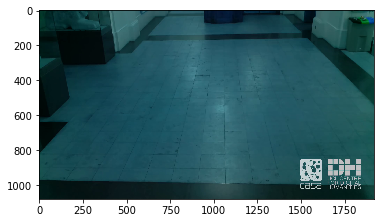

In [31]:
plt.imshow(frame)

In [33]:
counter = 0

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret:
        counter += 1
print(counter)


KeyboardInterrupt: 

In [34]:
counter

6718

In [127]:

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [128]:
cap.release()
cv2.destroyAllWindows()

In [8]:
start_time = '08:00'
start_date = '01-01-2015 00:00'
time = datetime.strptime(start_time, '%H:%M').time()
date = datetime.strptime(start_date, '%d-%m-%Y %H:%M').date()
print(time)
print(date)

08:00:00
2015-01-01


In [9]:
combined = datetime.combine(date, time)

In [10]:
combined

datetime.datetime(2015, 1, 1, 8, 0)

In [11]:
def get_youtube_paths(playlist_url):

    final_url = []
    eq = playlist_url.rfind('=') + 1
    cPL = playlist_url[eq:]
    yTUBE = urllib.request.urlopen(playlist_url).read()
    sTUBE = str(yTUBE)
    tmp_mat = re.compile(r'watch\?v=\S+?list=' + cPL)
    mat = re.findall(tmp_mat, sTUBE)
    for PL in mat:
        yPL = str(PL)
        if '&' in yPL:
            yPL_amp = yPL.index('&')
        final_url.append('http://www.youtube.com/' + yPL[:yPL_amp])

    all_url = list(OrderedDict.fromkeys(final_url))

    video_dict = {}

    for url in all_url:
        yt = YouTube(url)
        title = yt.title
        date_string = re.findall("(\d+\-\d+\-\d+)", title)
        date = datetime.strptime(date_string[0], "%d-%m-%Y")
        video_dict[date.date()] = yt.streams.first().url

        video_dates = sorted(video_dict.keys())

    if verbose:
        for date in video_dates:
            print(date)
            print(video_dict[date])

    return video_dates, video_dict

In [30]:
def yield_playlist(date):
    img_index = 0
    url = url_dict.get(date, False)
    print(url)
    if url:
        cap = cv2.VideoCapture(url)
        if not cap.isOpened():
            print('\n>>> Failed to capture {}'.format(date))
            yield None
        else:
            ret = True
            while ret:
                ret, frame = cap.read()
                yield img_index, frame
                img_index += 1
                if img_index > 10:
                    ret = False

            cap.release()

In [31]:
playlist_url = "https://www.youtube.com/watch?v=f5V-cH-9udI&list=UUDDgDE-EMc-tSyp7xy4Pk9w"
default_start = datetime.strptime('2015-10-28 00:00:00', '%Y-%m-%d %H:%M:%S').date()

In [32]:
verbose = False

In [15]:
dates, url_dict = get_youtube_paths(playlist_url)
url_dict

{datetime.date(2015, 10, 28): 'https://r4---sn-aigl6ned.googlevideo.com/videoplayback?ei=tDBnW7SsEIzUV6ijrdgO&itag=22&c=WEB&key=yt6&ratebypass=yes&ipbits=0&lmt=1446080581697395&sparams=dur,ei,id,initcwndbps,ip,ipbits,itag,lmt,mime,mm,mn,ms,mv,pl,ratebypass,requiressl,source,expire&ms=au,onr&id=o-AE-py1lor1YZHaD9mltCyoXsMmHlVzoroMCERzx6lRWS&mv=m&mt=1533489205&expire=1533510932&requiressl=yes&initcwndbps=870000&mime=video/mp4&ip=31.48.164.182&fvip=4&dur=556.001&source=youtube&pl=22&mn=sn-aigl6ned,sn-5hne6nsz&mm=31,26&signature=1C6A789AEBF19B56429759C921C9124846184F52.61D8370764039B7B029DFBFD6599078DBE483544',
 datetime.date(2015, 10, 29): 'https://r5---sn-aigzrn7e.googlevideo.com/videoplayback?requiressl=yes&dur=556.025&id=o-AABmC0y_0TS0-zOdTeOUSI2iOBQxUI9KwAA4bYzirZX6&mn=sn-aigzrn7e,sn-5hnekn7k&pl=22&fvip=5&mm=31,26&ms=au,onr&mv=m&mt=1533489354&signature=A54F7CC3C8147A1355EA2442E4CDE57CE017567C.77176F964DA3E41A82E55230F17602FA58F36128&key=yt6&ip=31.48.164.182&mime=video/mp4&ei=KzFnW7LOI

In [16]:
date = dates[8]

In [17]:
date

datetime.date(2015, 11, 5)

In [18]:
vid_example = 'https://r1---sn-aigzrn7s.googlevideo.com/videoplayback?fvip=1&ipbits=0&mn=sn-aigzrn7s,sn-5hne6ns6&mm=31,26&requiressl=yes&dur=556.025&mime=video/mp4&expire=1533338542&ms=au,onr&lmt=1446252530046019&ei=To9kW9LiH5OGVLizumg&mv=m&mt=1533316804&ratebypass=yes&pl=16&sparams=dur,ei,id,initcwndbps,ip,ipbits,itag,lmt,mime,mm,mn,ms,mv,pl,ratebypass,requiressl,source,expire&source=youtube&signature=CF7025C5A6D7A393A8949AE377AFB3F4A5BCA60C.209EABB81DD003093D84622AA782F23AAA303613&initcwndbps=1357500&key=yt6&ip=144.82.8.184&c=WEB&id=o-AH_Vr5pWxK0sZ17802IeeSIvg-PEE-KtNch1ckSMlebn&itag=22'

In [19]:
vid_example = url_dict.get(date, False)
vid_example

'https://r5---sn-aigzrn7s.googlevideo.com/videoplayback?itag=22&dur=556.466&fvip=5&ratebypass=yes&sparams=dur,ei,id,initcwndbps,ip,ipbits,itag,lmt,mime,mm,mn,ms,mv,pl,ratebypass,requiressl,source,expire&ip=31.48.164.182&c=WEB&signature=81650784287FD3DE92AE69164CC0DDCB80D77838.6B6DBF144A62481E8E66F17EF2A907C29A2359B3&lmt=1446771933528280&mv=m&ms=au,onr&requiressl=yes&ei=ITFnW5vKNpamxwK1toqYDQ&pl=22&mn=sn-aigzrn7s,sn-5hnedn7z&initcwndbps=861250&ipbits=0&mt=1533489354&source=youtube&mm=31,26&id=o-ACAwSyj87cSujH8BCxAdgffU_2qfzqfAWfyBaBMmZtzX&key=yt6&expire=1533511042&mime=video/mp4'

In [33]:
gen = yield_playlist(date)

In [34]:
for i, img in gen:
    print(i)
    image = img

https://r5---sn-aigzrn7s.googlevideo.com/videoplayback?itag=22&dur=556.466&fvip=5&ratebypass=yes&sparams=dur,ei,id,initcwndbps,ip,ipbits,itag,lmt,mime,mm,mn,ms,mv,pl,ratebypass,requiressl,source,expire&ip=31.48.164.182&c=WEB&signature=81650784287FD3DE92AE69164CC0DDCB80D77838.6B6DBF144A62481E8E66F17EF2A907C29A2359B3&lmt=1446771933528280&mv=m&ms=au,onr&requiressl=yes&ei=ITFnW5vKNpamxwK1toqYDQ&pl=22&mn=sn-aigzrn7s,sn-5hnedn7z&initcwndbps=861250&ipbits=0&mt=1533489354&source=youtube&mm=31,26&id=o-ACAwSyj87cSujH8BCxAdgffU_2qfzqfAWfyBaBMmZtzX&key=yt6&expire=1533511042&mime=video/mp4
0
1
2
3
4
5
6
7
8
9
10


In [35]:
type(image)

numpy.ndarray

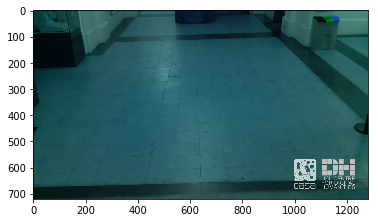

In [36]:
plt.imshow(image)

In [45]:
cap = cv2.VideoCapture(vid_example)

In [91]:
import os
img_dir = os.path.join('MOT/test/test1', 'img1')
img_names = os.listdir(img_dir)
img_names = sorted([d for d in img_names if not d.startswith('.')])
for img_name in img_names:
    img_paths = os.path.join(img_dir, img_name)
    print(img_paths)
    

MOT/test/test1/img1/timelapse_14800.jpg
MOT/test/test1/img1/timelapse_14801.jpg
MOT/test/test1/img1/timelapse_14802.jpg
MOT/test/test1/img1/timelapse_14803.jpg
MOT/test/test1/img1/timelapse_14804.jpg
MOT/test/test1/img1/timelapse_14805.jpg
MOT/test/test1/img1/timelapse_14806.jpg
MOT/test/test1/img1/timelapse_14807.jpg
MOT/test/test1/img1/timelapse_14808.jpg
MOT/test/test1/img1/timelapse_14809.jpg
MOT/test/test1/img1/timelapse_14810.jpg
MOT/test/test1/img1/timelapse_14811.jpg
MOT/test/test1/img1/timelapse_14812.jpg
MOT/test/test1/img1/timelapse_14813.jpg
MOT/test/test1/img1/timelapse_14814.jpg
MOT/test/test1/img1/timelapse_14815.jpg
MOT/test/test1/img1/timelapse_14816.jpg
MOT/test/test1/img1/timelapse_14817.jpg
MOT/test/test1/img1/timelapse_14818.jpg
MOT/test/test1/img1/timelapse_14819.jpg
MOT/test/test1/img1/timelapse_14820.jpg
MOT/test/test1/img1/timelapse_14821.jpg
MOT/test/test1/img1/timelapse_14822.jpg
MOT/test/test1/img1/timelapse_14823.jpg
MOT/test/test1/img1/timelapse_14824.jpg


In [103]:
def yield_directory():
    # Set up directory
    img_dir = os.path.join('MOT/test/test1', 'img1')
    img_names = os.listdir(img_dir)
    img_names = sorted([d for d in img_names if not d.startswith('.')])
    for img_name in img_names:
        img_path = os.path.join(img_dir, img_name)
        img = cv2.imread(img_path)

        # Extract frame number from image path
        image_index = [int(s) for s in list(img_name) if s.isdigit()]
        image_index = ''.join(str(x) for x in image_index)
        image_index = int(image_index)

        yield image_index, img
    yield None

In [104]:
gen = yield_directory()

In [105]:
for i, image in gen:
    print(i)

14800
14801
14802
14803
14804
14805
14806
14807
14808
14809
14810
14811
14812
14813
14814
14815
14816
14817
14818
14819
14820
14821
14822
14823
14824
14825
14826
14827
14828
14829
14830
14831
14832
14833
14834
14835
14836
14837
14838
14839
14840
14841
14842
14843
14844
14845
14846
14847
14848
14849
14850
14851
14852
14853
14854
14855
14856
14857
14858
14859
14860
14861
14862
14863
14864
14865
14866
14867
14868
14869
14870
14871
14872
14873
14874
14875
14876
14877
14878
14879
14880
14881
14882
14883
14884
14885
14886
14887
14888
14889
14890
14891
14892
14893
14894
14895
14896
14897
14898
14899


TypeError: 'NoneType' object is not iterable

In [143]:
import numpy as np
result_array = np.empty((0, 10))  # Results array
for img_index in range(2):
    result = img_index, -1, 8, 8, 8, 8, 4, -1, -1, -1
    result_array = np.append(result_array, [result], axis=0)
result_array    

array([[ 0., -1.,  8.,  8.,  8.,  8.,  4., -1., -1., -1.],
       [ 1., -1.,  8.,  8.,  8.,  8.,  4., -1., -1., -1.]])

In [145]:
for r, result in enumerate(result_array):
    if result[0] == 0:
        result[1] = 1
        
print(result_array)

[[ 0.  1.  8.  8.  8.  8.  4. -1. -1. -1.]
 [ 1. -1.  8.  8.  8.  8.  4. -1. -1. -1.]]
